0 -> background

1 -> left ventricular cavity

2 -> myocardium

3 -> left atrium cavity

In [1]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48.4 MB 1.7 MB/s 


In [2]:
import SimpleITK as sitk
import os
import numpy as np

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
spacing = [0.308,0.154]
# Path to directory of dataset
PATH="/content/drive/MyDrive/training"

for r,d,f in os.walk(PATH):
    for file in f:
        if ('ED_gt.mhd' in file) or ('ES_gt.mhd' in file):
            
            image = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(r,file)))

            #eliminate the first axis to get a 2D image
            image = image.squeeze()
            
            bck=np.where (image == 0, 1, 0)
            lv = np.where (image == 1, 1, 0)
            myo = np.where (image == 2,1 ,0)
            la = np.where (image == 3, 1 , 0)
            
            # Encoding in Char as the original format 
            bck=bck.astype('uint8')
            lv = lv.astype('uint8')
            la = la.astype('uint8')
            myo = myo.astype('uint8')
            
            bckImage = sitk.GetImageFromArray(bck,isVector=False)
            bckImage.SetSpacing(spacing)
            sitk.WriteImage(bckImage,os.path.join(r,file)[:-4]+"0.mhd",False)

            lvImage = sitk.GetImageFromArray(lv,isVector=False)
            lvImage.SetSpacing(spacing)
            sitk.WriteImage(lvImage,os.path.join(r,file)[:-4]+"1.mhd",False)
            
            laImage = sitk.GetImageFromArray(la,isVector=False)
            laImage.SetSpacing(spacing)
            sitk.WriteImage(laImage,os.path.join(r,file)[:-4]+"3.mhd",False)
            
            myoImage = sitk.GetImageFromArray(myo,isVector=False)
            myoImage.SetSpacing(spacing)
            sitk.WriteImage(myoImage,os.path.join(r,file)[:-4]+"2.mhd",False)


In [ ]:
image.shape

(1, 779, 472)

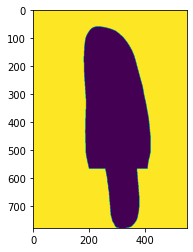

In [ ]:
import SimpleITK as sitk
import os
import numpy as np
import matplotlib.pyplot as plt

PATH="/content/drive/MyDrive/training/patient0001"
for r,d,f in os.walk(PATH):
    for file in f:
        for i in range (1):
            if ('ED_gt' + str(i) + '.mhd' in file) or ('ES_gt' + str (i) + '.mhd' in file):        
                image = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(r,file)))
                
                plt.imshow(image)